Train - R2:	0.987
Train - MAE:	0.086
Train - RMSE:	0.113
Train - upravene R2:	0.987

Test - R2:	0.680
Test - MAE:	0.446
Test - RMSE:	0.967
Test - upravene R2:	0.679


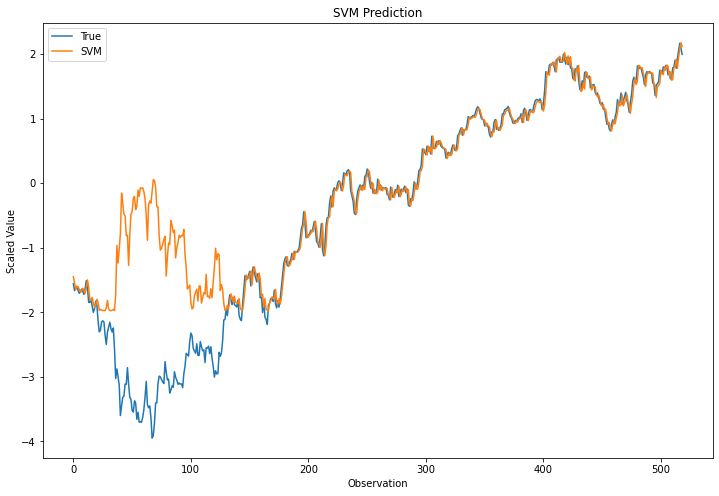

In [6]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import r2_score

def adj_r2_score(r2, n, p):
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Loading dataset
exchange_data = pd.read_csv('EURUSD.csv')
exchange_data["Date"] = pd.to_datetime(exchange_data["Date"])
ind_exchange_data = exchange_data.set_index(["Date"], drop=True)

# Sorting data in ascending order
data_frame = ind_exchange_data.sort_index(axis=1, ascending=True)
data_frame = data_frame.iloc[::-1]
df = data_frame[["close"]]

# Splitting data into train and test sets
split_date = pd.Timestamp('01-01-2021')
train = df.loc[split_date:]
test = df.loc[:split_date]

# Standardizing data
sc = StandardScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

# Creating features and labels
X_train = train_sc[:-1]
y_train = train_sc[1:].ravel()  # Flatten to fit SVR requirements

X_test = test_sc[:-1]
y_test = test_sc[1:].ravel()  # Flatten to fit SVR requirements

# Training model
svm_model = SVR()  # Using default parameters, but you may want to tune these
svm_model.fit(X_train, y_train)

y_pred_test = svm_model.predict(X_test)
y_train_pred = svm_model.predict(X_train)

# Calculating evaluation metrics
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(train_mse)

test_mse = metrics.mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(test_mse)

print("Train - R2:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("Train - MAE:\t{:0.3f}".format(metrics.mean_absolute_error(y_train, y_train_pred)))
print("Train - RMSE:\t{:0.3f}".format(rmse_train))
r2_train = r2_score(y_train, y_train_pred)
print("Train - upravene R2:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))

print("Test - R2:\t{:0.3f}".format(r2_score(y_test, y_pred_test)))
r2_test = r2_score(y_test, y_pred_test)
print("Test - MAE:\t{:0.3f}".format(metrics.mean_absolute_error(y_test, y_pred_test)))
print("Test - RMSE:\t{:0.3f}".format(rmse_test))
print("Test - upravene R2:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

# Plotting true vs predicted values
plt.figure(figsize=(12, 8))
plt.plot(y_test, label='True')
plt.plot(y_pred_test, label='SVM')
plt.title("SVM Prediction")
plt.xlabel('Observation')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()